In [1]:
import pandas as pd
import seaborn as sns
df=pd.read_table('https://raw.githubusercontent.com/DCMLab/beethoven_piano_sonatas/main/harmonies/21-1.harmonies.tsv')

In [2]:
df.head()

,mc,mn,quarterbeats,quarterbeats_all_endings,duration_qb,mc_onset,mn_onset,timesig,staff,voice,...,relativeroot,cadence,phraseend,chord_type,globalkey_is_minor,localkey_is_minor,chord_tones,added_tones,root,bass_note
0,1,1,0,0,7.0,0,0,4/4,2,1,...,NaN,NaN,{,M,0,0,"0, 4, 1",NaN,0.0,0.0
1,2,2,7,7,1.0,3/4,3/4,4/4,2,1,...,V,NaN,NaN,Mm7,0,0,"0, 2, 6, 3",NaN,2.0,0.0
2,3,3,8,8,8.0,0,0,4/4,2,1,...,NaN,NaN,NaN,M,0,0,"5, 2, 1",NaN,1.0,5.0
3,5,5,16,16,7.0,0,0,4/4,2,1,...,IV,NaN,NaN,M,0,0,"-2, 2, -1",NaN,-2.0,-2.0
4,6,6,23,23,1.0,3/4,3/4,4/4,2,1,...,IV,NaN,NaN,Mm7,0,0,"-2, 0, 4, 1",NaN,0.0,-2.0


In [3]:
phrases_df = df.dropna(subset=['phraseend'])
phrases_df.head()
#get only rows with with a phrase beginning or ending

,mc,mn,quarterbeats,quarterbeats_all_endings,duration_qb,mc_onset,mn_onset,timesig,staff,voice,...,relativeroot,cadence,phraseend,chord_type,globalkey_is_minor,localkey_is_minor,chord_tones,added_tones,root,bass_note
0,1,1,0,0,7.0,0,0,4/4,2,1,...,NaN,NaN,{,M,0,0,"0, 4, 1",NaN,0.0,0.0
15,13,13,48,48,4.0,0,0,4/4,2,1,...,NaN,HC,},M,0,0,"1, 5, 2",NaN,1.0,1.0
16,14,14,52,52,7.0,0,0,4/4,2,1,...,NaN,NaN,{,M,0,0,"0, 4, 1",NaN,0.0,0.0
39,29,29,112,112,1.0,0,0,4/4,2,1,...,NaN,HC,},M,0,0,"1, 5, 2",NaN,1.0,1.0
46,31,31,120,120,0.0,0,0,4/4,2,1,...,NaN,NaN,{,NaN,0,0,NaN,NaN,NaN,NaN


In [4]:
x = phrases_df['quarterbeats_all_endings'].astype(int)
x

0         0
15       48
16       52
39      112
46      120
62      136
82      164
83      168
105     196
147     236
156     292
172     324
173     325
184     340
186     348
187     349
198     364
247     452
317     572
319     628
349     700
376     764
383     772
399     788
419     816
420     820
442     848
484     888
493     944
509     976
510     977
515     984
516     985
521     992
522     993
527    1000
549    1040
575    1132
576    1140
604    1184
615    1212
Name: quarterbeats_all_endings, dtype: int64

In [6]:
y = x.diff()
y
#getting phrase lengths from quarterbeat values in successive phrase markings

0        NaN
15      48.0
16       4.0
39      60.0
46       8.0
62      16.0
82      28.0
83       4.0
105     28.0
147     40.0
156     56.0
172     32.0
173      1.0
184     15.0
186      8.0
187      1.0
198     15.0
247     88.0
317    120.0
319     56.0
349     72.0
376     64.0
383      8.0
399     16.0
419     28.0
420      4.0
442     28.0
484     40.0
493     56.0
509     32.0
510      1.0
515      7.0
516      1.0
521      7.0
522      1.0
527      7.0
549     40.0
575     92.0
576      8.0
604     44.0
615     28.0
Name: quarterbeats_all_endings, dtype: float64

In [11]:
new_df = pd.Series(x, name="Position in Movement (Quarter Beat)").to_frame().join(pd.Series(y, name="Phrase Length (In Quarter Beats)"))
new_df.head()

,Position in Movement (Quarter Beat),Phrase Length (In Quarter Beats)
0,0,NaN
15,48,48.0
16,52,4.0
39,112,60.0
46,120,8.0


<Axes: xlabel='Position in Movement (Quarter Beat)', ylabel='Phrase Length (In Quarter Beats)'>

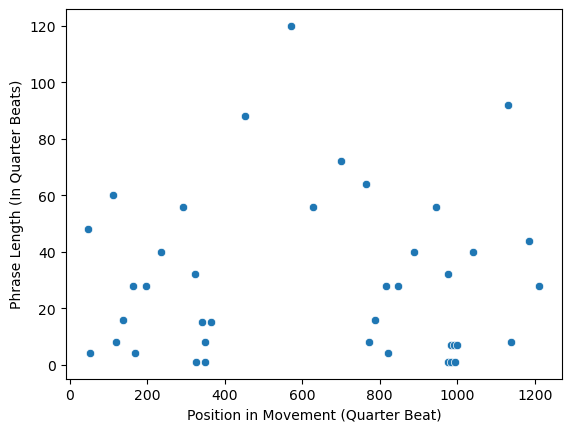

In [13]:
sns.scatterplot(x=new_df['Position in Movement (Quarter Beat)'], y=new_df['Phrase Length (In Quarter Beats)'])
#visualize lengths of phrases across entire movement